## Phase Plane Plotter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Below is a set of parameters that can be adjusted based on your specific needs.

In [9]:
matrix = [[-1,6],[-3,8]]
eigenvector_plot = True
initial_conditions = [(-1, 0), (1, 0), (0, 1), (0, -1)]
t_bound = 40
t_span = [0, t_bound]
bound = 10

Computation and Plotting

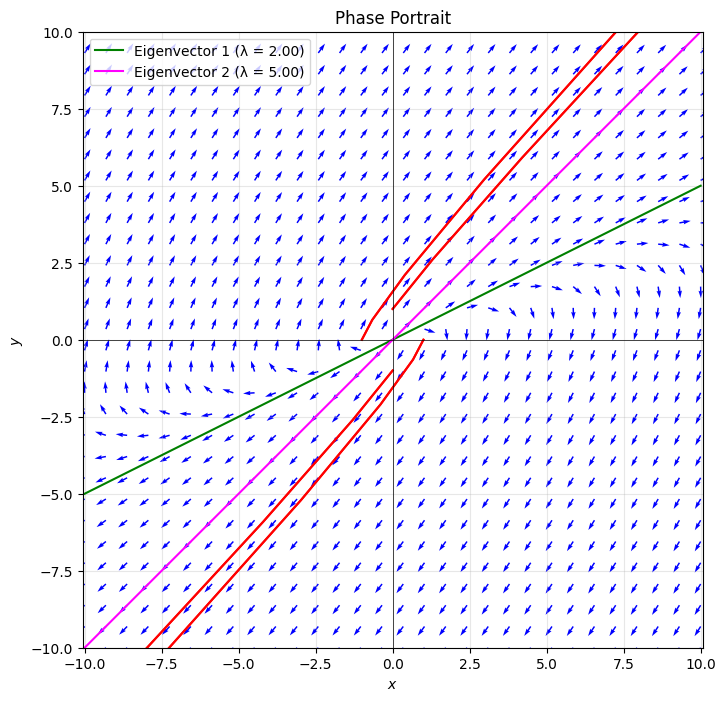

In [13]:
def system(t,z):
    x, y = z
    dxdt = matrix[0][0]*x + matrix[0][1]*y
    dydt = matrix[1][0]*x + matrix[1][1]*y
    return [dxdt, dydt]

x = np.linspace(-bound, bound, 30)
y = np.linspace(-bound, bound, 30)
X, Y = np.meshgrid(x, y)

U = matrix[0][0]*X + matrix[0][1]*Y
V = matrix[1][0]*X + matrix[1][1]*Y
magnitude = np.sqrt(U**2 + V**2)
U /= magnitude
V /= magnitude

plt.figure(figsize=(8,8))
plt.quiver(X, Y, U, V, color='blue')

for x0, y0 in initial_conditions:
    sol_forward = solve_ivp(system, t_span, [x0, y0], t_eval=np.linspace(0, t_bound, 300))

    plt.plot(sol_forward.y[0], sol_forward.y[1], 'r')
    
    sol_backward = solve_ivp(system, [-t_span[1], 0], [x0, y0], t_eval=np.linspace(-t_bound, 0, 300))
    plt.plot(sol_backward.y[0], sol_backward.y[1], 'r')

def plot_eigenvectors(matrix,range_limit):

    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    v1, v2 = eigenvectors[:, 0], eigenvectors[:, 1]#

    ax = plt.gca()
    
    x_vals = np.array([-range_limit, range_limit])
    
    y_vals_v1 = (v1[1] / v1[0]) * x_vals
    y_vals_v2 = (v2[1] / v2[0]) * x_vals 
    
    ax.plot(x_vals, y_vals_v1, color='green', label=f"Eigenvector 1 (λ = {eigenvalues[0]:.2f})")
    ax.plot(x_vals, y_vals_v2, color='magenta', label=f"Eigenvector 2 (λ = {eigenvalues[1]:.2f})")
    
    ax.grid(True)
    ax.legend()

if eigenvector_plot:
    plot_eigenvectors(matrix, range_limit=bound)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Phase Portrait')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(alpha=0.3)
plt.axis('equal')
plt.xlim(-bound, bound)
plt.ylim(-bound, bound)
plt.show()
